# Case 4 -

Among the top 10 scorers from manchester clubs who was the most proffiecient i.e., who has the best conversion rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [2]:
path = 'C:/Users/91958/Desktop/nyadata/PL_Player_Stats.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
case4 = df.copy()

In [5]:
case4.columns = ['Rank','PLAYER','TEAM','GamesPlayed','GamesStarted','MIN','Goals','Assists','TotalShots','SOT']
case4.columns

Index(['Rank', 'PLAYER', 'TEAM', 'GamesPlayed', 'GamesStarted', 'MIN', 'Goals',
       'Assists', 'TotalShots', 'SOT'],
      dtype='object')

In [6]:
case4['PLAYER'].replace("Pierre-Emerick Aubameyang", "Pierre Aubameyang", inplace = True)
case4['PLAYER'].replace("Raheem Shaquille Sterling", "Raheem Sterling", inplace = True)
case4['PLAYER'].replace("Mohamed Salah Ghaly", "Moh Salah", inplace = True)
case4['PLAYER'].replace("Gabriel Fernando de Jesus", "G.Jesus", inplace = True)
case4['PLAYER'].replace("Sergio Leonel Agüero del Castillo", "Sergio Aguero", inplace = True)
case4['PLAYER'].replace("Bruno Miguel Borges Fernandes", "Bruno Fernandes", inplace = True)
case4['PLAYER'].replace("Pierre-Emerick Aubameyang", "Pierre Aubameyang", inplace = True)
case4['PLAYER'].replace("Raheem Shaquille Sterling", "Raheem Sterling", inplace = True)
case4['PLAYER'].replace("Mohamed Salah Ghaly", "Moh Salah", inplace = True)

In [7]:
#Filtering na if any

case4.dropna(inplace = True, subset = ['PLAYER'])
case4.reset_index(inplace = True, drop = True)

In [8]:
temp = case4["TEAM"].value_counts()
temp.index

Index(['Arsenal', 'West Ham United', 'Manchester United', 'Norwich City',
       'Watford', 'Tottenham Hotspur', 'Liverpool', 'Newcastle United',
       'Bournemouth', 'Burnley', 'Crystal Palace', 'Chelsea', 'Southampton',
       'Aston Villa', 'Sheffield United', 'Everton', 'Manchester City',
       'Leicester City', 'Brighton and Hove Albion',
       'Wolverhampton Wanderers'],
      dtype='object')

In [9]:
# Filtering the clubs 

case4 = case4[(case4['TEAM'] == 'Manchester United') | (case4['TEAM'] == 'Manchester City')]

In [10]:
# Reseting the Indexing 

case4.reset_index(drop=True,inplace = True)

# Sorting values according to total goals scored

finding out the top 7 scorers among the manchester clubs

In [11]:
case4 = case4.sort_values(by = ["Goals"], ascending = False)
case4.head()

,Rank,PLAYER,TEAM,GamesPlayed,GamesStarted,MIN,Goals,Assists,TotalShots,SOT
0,4,Raheem Sterling,Manchester City,33,30,2660,20,1,68,38
1,9,Marcus Rashford,Manchester United,31,31,2653,17,7,77,44
2,10,Anthony Martial,Manchester United,32,31,2638,17,6,59,40
3,11,Sergio Aguero,Manchester City,24,18,1456,16,3,54,28
4,13,G.Jesus,Manchester City,34,21,2027,14,7,81,48


### Creating a function to get the conversion rate and total shots missed

In [12]:
def GperMIN(player,G,SOT,TotalShots):
    di = {}   ## key as player name value as mintues per goals and conversion rate and shots off target in a list as value 
    
    n = len(player)
    for index in range(n):
        i = player[index]
        g = G[index]
        sot = SOT[index]
        t = TotalShots[index]
        li = []
        if sot !=0:
            conversion_rate = g/sot
            li.append(conversion_rate)
            
            off_target_shots = t-sot
            li.append(off_target_shots)
            di[i] =  li
        else:
            continue
    return di    

In [13]:
dictionary = GperMIN(case4["PLAYER"],case4["Goals"],case4["SOT"],case4["TotalShots"])
dictionary

{'Raheem Sterling': [0.5263157894736842, 30],
 'Marcus Rashford': [0.38636363636363635, 33],
 'Anthony Martial': [0.425, 19],
 'Sergio Aguero': [0.5714285714285714, 26],
 'G.Jesus': [0.2916666666666667, 33],
 'Kevin De Bruyne': [0.41935483870967744, 39],
 'Riyad Mahrez': [0.34375, 19],
 'Mason Greenwood': [0.5, 12],
 'Bruno Fernandes': [0.4444444444444444, 19],
 'David Silva': [0.3333333333333333, 14],
 'Bernardo Mota Veiga de Carvalho e Silva': [0.4, 14],
 'Phil Foden': [0.3333333333333333, 11],
 'Scott McTominay': [0.4, 7],
 'Rodrigo Hernández Cascante': [0.3333333333333333, 11],
 'Daniel James': [0.15, 12],
 'İlkay Gündoğan': [0.25, 11],
 'Nicolás Hernán Otamendi': [0.2857142857142857, 5],
 'Kyle Walker': [0.3333333333333333, 6],
 'Aymeric Laporte': [0.5, 1],
 'Jesse Lingard': [0.16666666666666666, 6],
 'Andreas Hugo Hoelgebaum Pereira': [0.07142857142857142, 14],
 'Paul Pogba': [0.125, 9],
 'Victor Lindelöf': [1.0, 4],
 'Harry Maguire': [0.125, 17],
 'Brandon Williams': [0.5, 3],
 

In [14]:
top7 = pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
top7.head()

,0,1
Raheem Sterling,0.526316,30
Marcus Rashford,0.386364,33
Anthony Martial,0.425000,19
Sergio Aguero,0.571429,26
G.Jesus,0.291667,33


In [15]:
x= []
y = []
t = []
for i in range (7):
    x.append(top7.index[i])
    y.append(top7.values[i][0])
    t.append(top7.values[i][1])
t    

[30.0, 33.0, 19.0, 26.0, 33.0, 39.0, 19.0]

In [16]:
print("List Of Top 7 Goal Scorers From Two Manchester Clubs in the Premier League 2019/20 Season - ")
i = 0
for ele in x:
    print(i+1,end='')
    print(": ",end = '')
    print(ele)
    
    i += 1

List Of Top 7 Goal Scorers From Two Manchester Clubs in the Premier League 2019/20 Season - 
1: Raheem Sterling
2: Marcus Rashford
3: Anthony Martial
4: Sergio Aguero
5: G.Jesus
6: Kevin De Bruyne
7: Riyad Mahrez


In [17]:
import copy           # Important to change size of the bubble so that it can be mentioned or seen who missed the most

temp = copy.copy(t)

for idx in range(len(temp)):
    temp[idx] = temp[idx]*4.5


# Plotting Bubble graph

size of the bubble is the number of shots off target. 

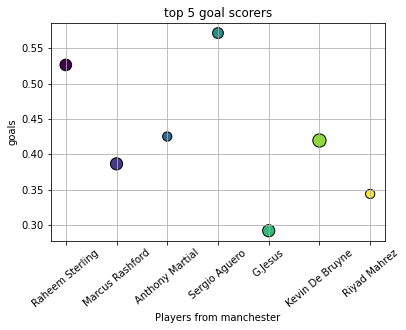

In [18]:
col = np.arange(len(temp))
plt.scatter(x,y,c=col,s=temp,edgecolor = 'black',label = y)

plt.xlabel("Players from manchester")
plt.xticks(rotation = 40)
plt.grid()
   

plt.ylabel("goals")
plt.title("top 5 goal scorers")
plt.show()

In [19]:
li = list(zip(x,y,t))
# creating this list for indexing to start from 1 instead of zero
idxli = []
for i in range(1,8):
    idxli.append(i)
da = pd.DataFrame(li,columns=['Players','Conversion rate','Off Traget Shots'],index = idxli)
da

,Players,Conversion rate,Off Traget Shots
1,Raheem Sterling,0.526316,30.0
2,Marcus Rashford,0.386364,33.0
3,Anthony Martial,0.425000,19.0
4,Sergio Aguero,0.571429,26.0
5,G.Jesus,0.291667,33.0
6,Kevin De Bruyne,0.419355,39.0
7,Riyad Mahrez,0.343750,19.0
